##IMPORT PACKAGES

In [ ]:
# !pip install -U numpy scipy scikit-learn joblib

In [ ]:
# !pip uninstall numpy -y
# !pip install numpy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

import math
import joblib
import dill

# print(joblib.__version__)
# print(np.__version__)
# print(scikit-learn.__version__)

##BASIC OPERATIONS

###ADDITION

In [ ]:
class AdditionModel:
    def __init__(self):
        self.model = LinearRegression()

    def load_data(self, filepath):
        data = pd.read_excel(filepath)
        self.X = data.iloc[:, 0:-1]
        self.Y = data.iloc[:, -1]
        return data.head()  # Optional, can return head for preview

    def train(self, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(
            self.X, self.Y, test_size=test_size, random_state=random_state)
        self.model.fit(self.X_train, self.Y_train)
        return self.model.score(self.X_test, self.Y_test)

    def save_model(self, path):
        joblib.dump(self.model, path)

    def load_model(self, path):
        self.model = joblib.load(path)

    def predict(self, X):
        return self.model.predict(X)

# This part runs only if you open model.ipynb directly (not on import)
if __name__ == "__main__":
    model = AdditionModel()
    model.load_data('/content/drive/MyDrive/Colab Notebooks/Dataset/Addition.xlsx')
    score = model.train()
    print(f"Model score: {score}")
    model.save_model('/content/drive/MyDrive/Colab Notebooks/Trained models/addition.pkl')

Model score: 1.0


###SUBTRACTION

In [ ]:
class SubtractionModel:
    def __init__(self):
        self.model = LinearRegression()

    def load_data(self, filepath):
        data = pd.read_excel(filepath)
        self.X = data.iloc[:, :-1]
        self.Y = data.iloc[:, -1]
        return data.head()

    def train(self, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(
            self.X, self.Y, test_size=test_size, random_state=random_state)
        self.model.fit(self.X_train, self.Y_train)
        return self.model.score(self.X_test, self.Y_test)

    def save_model(self, path):
        joblib.dump(self.model, path)

    def load_model(self, path):
        self.model = joblib.load(path)

    def predict(self, X):
        return self.model.predict(X)

# Optional test block that only runs when opening this file directly
if __name__ == "__main__":
    model = SubtractionModel()
    model.load_data('/content/drive/MyDrive/Colab Notebooks/Dataset/Subtraction.xlsx')
    score = model.train()
    print(f"Model score: {score}")
    model.save_model('/content/drive/MyDrive/Colab Notebooks/Trained models/subtraction.pkl')

Model score: 1.0


###MULTIPLICATION

In [ ]:
class MultiplicationModel:
    def __init__(self):
        self.model = make_pipeline(
            PolynomialFeatures(degree=2, include_bias=False),
            LinearRegression()
        )

    def load_data(self, filepath):
        df = pd.read_excel(filepath)
        df.columns = df.columns.str.strip()  # clean column names
        self.X = df[['Value 1', 'Value 2']]
        self.y = df['Multiplication']
        return df.head()

    def train(self, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state)
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)

    def save_model(self, path):
        joblib.dump(self.model, path)

    def load_model(self, path):
        self.model = joblib.load(path)

    def predict(self, val1, val2):
      input_df = pd.DataFrame([[val1, val2]], columns=['Value 1', 'Value 2'])
      prediction = self.model.predict(input_df)[0]
      return round(prediction, 8)


# This block runs only when opened directly (not on import)
if __name__ == "__main__":
    model = MultiplicationModel()
    model.load_data("/content/drive/MyDrive/Colab Notebooks/Dataset/Multiplication.xlsx")
    score = model.train()
    print(model.predict(2, 3))
    print(f"Model score: {score}")
    model.save_model("/content/drive/MyDrive/Colab Notebooks/Trained models/multiplication.pkl")

6.0
Model score: 1.0


###DIVISION

In [ ]:
class DivisionModel:
    def __init__(self, multiplication_model):
        self.multiplication_model = multiplication_model

    def predict(self, X):
        X_copy = X.copy()
        X_copy['Value 2'] = X_copy['Value 2'].apply(lambda x: 1 / x if x != 0 else np.sign(x) * 1e-9)
        return self.multiplication_model.predict(X_copy)

    @staticmethod
    def save(model, path):
        with open(path, 'wb') as f:
            dill.dump(model, f)

    @staticmethod
    def load(path):
        with open(path, 'rb') as f:
            return dill.load(f)

# This block only runs when executed directly
if __name__ == "__main__":
    # Load pre-trained multiplication model
    multiplication_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Trained models/multiplication.pkl')

    # Wrap in DivisionModel
    division_model = DivisionModel(multiplication_model)

    # Save using dill
    DivisionModel.save(
        division_model,
        '/content/drive/MyDrive/Colab Notebooks/Trained models/division_model.dill'
    )
    print("✅ Division model saved using dill.")


✅ Division model saved using dill.


#NON LINEAR FUNCTIONS



##EXPONENTIAL




In [ ]:
class ExponentialModel:
    def __init__(self, degree=10, max_chunk=2):
        self.degree = degree
        self.max_chunk = max_chunk
        self.poly = PolynomialFeatures(degree=self.degree)
        self.model = LinearRegression()

    def fit(self, X, y):
        X_poly = self.poly.fit_transform(X)
        self.model.fit(X_poly, y)

    def predict_exp(self, x):
        if x == 0:
            return 1.0
        if x < 0:
            return 1.0 / self.predict_exp(-x)

        result = 1.0
        while x > 0:
            chunk = min(x, self.max_chunk)
            x -= chunk
            chunk_poly = self.poly.transform([[chunk]])
            result *= self.model.predict(chunk_poly)[0]
        return result

    def score(self, X, y):
        X_poly = self.poly.transform(X)
        return self.model.score(X_poly, y)

    def save(self, path):
        joblib.dump({'model': self.model, 'poly': self.poly}, path)

    def load(self, path):
        data = joblib.load(path)
        self.model = data['model']
        self.poly = data['poly']

# Train and save (only runs if directly executed)
if __name__ == "__main__":
    # Load data
    df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/exponential.xlsx")
    X = df.iloc[:, 0].values.reshape(-1, 1)
    y = df.iloc[:, 1].values.ravel()

    # Train and evaluate
    exp_model = ExponentialModel(degree=10, max_chunk=2)
    exp_model.fit(X, y)
    print("R² score:", exp_model.score(X, y))

    # Save trained model
    exp_model.save("/content/drive/MyDrive/Colab Notebooks/Trained models/exponential.pkl")

    # Reload and test
    exp_model = ExponentialModel()
    exp_model.load("/content/drive/MyDrive/Colab Notebooks/Trained models/exponential.pkl")

    x_val = float(input("Enter x to calculate exp(x): "))
    pred = exp_model.predict_exp(x_val)
    actual = math.exp(x_val)
    error = (abs(pred - actual) / actual )*100

    print(f"\nPredicted: {pred:.6f}")
    print(f"Actual:    {actual:.6f}")
    print(f"Error %:     {error:.6f}")


R² score: 0.9999999983416319
Enter x to calculate exp(x): 20

Predicted: 484152048.139571
Actual:    485165195.409790
Error %:     0.208825


##NATURAL LOGARITHMIC

In [ ]:
class LnModel:
    def __init__(self, degree=4, chunk=100):
        self.degree = degree
        self.chunk = chunk
        self.poly = PolynomialFeatures(degree=self.degree)
        self.model = LinearRegression()

    def fit(self, X, y):
        X_poly = self.poly.fit_transform(X)
        self.model.fit(X_poly, y)

    def predict_ln(self, x):
      if x <= 0:
          raise ValueError("Input must be positive")

      invert = False
      if x < 1:
          x = 1 / x
          invert = True

      ln_sum = 0
      remaining = x

      if remaining <= self.chunk:
          x_poly = self.poly.transform(pd.DataFrame([[remaining]], columns=['x']))
          ln_sum = self.model.predict(x_poly)[0]
      else:
          while remaining > self.chunk:
              part_poly = self.poly.transform(pd.DataFrame([[self.chunk]], columns=['x']))
              ln_sum += self.model.predict(part_poly)[0]
              remaining /= self.chunk

          final_poly = self.poly.transform(pd.DataFrame([[remaining]], columns=['x']))
          ln_sum += self.model.predict(final_poly)[0]

      if invert:
          ln_sum = -ln_sum

      return ln_sum

    def save(self, path):
        joblib.dump({'model': self.model, 'poly': self.poly}, path)

# Train and save model
if __name__ == "__main__":
    df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/ln.xlsx")
    df.columns = ['x', 'ln_x']
    x = df[['x']]
    y = df['ln_x']

    model = LnModel(degree=4, chunk=100)
    model.fit(x, y)
    model.save("/content/drive/MyDrive/Colab Notebooks/Trained models/ln_model.pkl")
    print("Model trained and saved successfully.")


Model trained and saved successfully.


## POWER

In [ ]:
class Power_Model:
    def __init__(self, data_path=None, degree=6):
      self.data_path = data_path
      self.degree = degree
      self.model = None


    def load_and_prepare_data(self):
        df = pd.read_excel(self.data_path)
        df['log_a'] = np.log(df['a'])
        df['log_a_power_b'] = np.log(df['a_pow_b'])

        X = df[['log_a', 'b']].values
        y = df['log_a_power_b'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        print(f"✅ Data loaded: {len(df)} samples.")

    def train(self):
        self.model = make_pipeline(
            PolynomialFeatures(self.degree),
            LinearRegression()
        )
        self.model.fit(self.X_train, self.y_train)
        print("✅ Model trained.")

    def save_model(self, filepath):
        joblib.dump(self.model, filepath)
        print(f"✅ Model saved to {filepath}")

    def load_model(self, filepath):
        self.model = joblib.load(filepath)
        # print(f"✅ Model loaded from {filepath}")

    def evaluate(self):
        y_pred = self.model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f"📊 Model evaluation:")
        print(f"  MSE: {mse:.6f}")
        print(f"  R²:  {r2:.6f}")

    @staticmethod
    def is_even_integer(n):
        return (isinstance(n, int) or (float(n).is_integer())) and int(n) % 2 == 0

    @staticmethod
    def is_odd_integer(n):
        return (isinstance(n, int) or (float(n).is_integer())) and int(n) % 2 == 1

    def predict_power(self, a, b):
        try:
            if a == 0:
                return 0.0

            if a < 0:
                if not float(b).is_integer():
                    print("⚠ Complex result — fractional powers of negative numbers are not supported.")
                    return float('nan')

                log_a = math.log(abs(a))
                features = np.array([[log_a, abs(b)]])
                log_output = self.model.predict(features)[0]
                predicted = np.exp(log_output)

                if b < 0:
                    predicted = 1 / predicted

                if self.is_even_integer(b):
                    return predicted
                elif self.is_odd_integer(b):
                    return -predicted
                else:
                    return float('nan')

            log_a = math.log(a)
            features = np.array([[log_a, abs(b)]])
            log_output = self.model.predict(features)[0]
            predicted = np.exp(log_output)

            if b < 0:
                return 1 / round(predicted,6)
            return round(predicted,6)

        except Exception as e:
            print("❌ Error in prediction:", e)
            return float('nan')


# Only runs when file is executed directly
if __name__ == "__main__":
    model =  Power_Model("/content/drive/MyDrive/Colab Notebooks/Dataset/qwack.xlsx")
    model.load_and_prepare_data()
    model.train()
    model.evaluate()
    model.save_model("/content/drive/MyDrive/Colab Notebooks/Trained models/power.pkl")

✅ Data loaded: 913 samples.
✅ Model trained.
📊 Model evaluation:
  MSE: 0.000000
  R²:  1.000000
✅ Model saved to /content/drive/MyDrive/Colab Notebooks/Trained models/power.pkl


##FACTORIAL

In [ ]:
class FactorialModel:
    def __init__(self, degree=4):
        self.degree = degree
        self.poly = PolynomialFeatures(degree=self.degree)
        self.model = LinearRegression()

    def fit(self, X, y):
        X_poly = self.poly.fit_transform(X)
        self.model.fit(X_poly, y)

    def predict_factorial(self, n):
        if n <= 0 or int(n) != n:
            raise ValueError("Input must be a positive integer")
        X_poly = self.poly.transform([[n]])
        log_fact = self.model.predict(X_poly)[0]
        return np.exp(log_fact)

    def save(self, path):
        joblib.dump({'model': self.model, 'poly': self.poly}, path)

    def load(self, path):
        data = joblib.load(path)
        self.model = data['model']
        self.poly = data['poly']

    def score(self,x,y):
      x_poly = self.poly.fit_transform(X)
      return self.model.score(x_poly,y)

if __name__ == "__main__":
    N = 20
    X = np.arange(1, N + 1).reshape(-1, 1)
    y = np.log([math.factorial(i) for i in range(1, N + 1)])

    factorial_model = FactorialModel(degree=4)
    factorial_model.fit(X, y)
    print("Score :",factorial_model.score(X,y))
    factorial_model.save("/content/drive/MyDrive/Colab Notebooks/Trained models/factorial_model.pkl")
    print("Factorial model trained and saved.")

Score : 0.9999945661196226
Factorial model trained and saved.


#TRIGONOMETRIC FUNCTIONS

###SINE(X) FUNCTION

In [ ]:
class SineModel:
    def __init__(self, data_path):
        self.data_path = data_path
        self.scaler = MinMaxScaler()
        self.model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

    def load_data(self):
        df = pd.read_excel(self.data_path)
        df.columns = df.columns.str.strip()
        if 'x' not in df.columns or ('sinx' not in df.columns and 'sin_val' not in df.columns):
            raise ValueError("Dataset must contain 'x' and 'sinx' or 'sin_val' columns.")
        self.X = df[['x']]
        y_column = 'sin_val' if 'sin_val' in df.columns else 'sinx'
        self.y = df[[y_column]]

    def preprocess(self):
        self.X_scaled = self.scaler.fit_transform(self.X)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X_scaled, self.y, test_size=0.2, random_state=42
        )

    def train(self):
        self.model.fit(self.X_train, self.y_train.values.ravel())

    def evaluate(self):
        y_pred = self.model.predict(self.X_test)
        r2 = r2_score(self.y_test, y_pred)
        mae = mean_absolute_error(self.y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))

        print(f"\nModel Evaluation:")
        print(f"R-squared: {r2:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")

    def predict(self, x_val):
        x_scaled = self.scaler.transform([[x_val]])
        return self.model.predict(x_scaled)[0]

    def save_model(self, model_path):
        joblib.dump((self.model, self.scaler), model_path)
        print(f"Model saved to {model_path}")

    def load_model(self, model_path):
        self.model, self.scaler = joblib.load(model_path)
        # print(f"Model loaded from {model_path}")

# ==== Main Execution ====
if __name__ == "__main__":
    path = "/content/drive/MyDrive/Colab Notebooks/Dataset/sine.xlsx"
    sine_model = SineModel(path)
    sine_model.load_data()
    sine_model.preprocess()
    sine_model.train()
    sine_model.evaluate()

    print("\n--- Sine Prediction Example ---")
    try:
        x_input = float(input("Enter an x value: "))
        predicted = sine_model.predict(x_input)
        actual = np.sin(x_input)
        accuracy = 100 - abs(predicted - actual) * 100

        print("\nPrediction Results:")
        print(f"Predicted: {predicted:.4f}")
        print(f"Actual: {actual:.4f}")
        print(f"Accuracy: {accuracy:.2f}%")
    except Exception as e:
        print("Error during prediction:", e)


    # Save model and scaler
    sine_model.save_model("/content/drive/MyDrive/Colab Notebooks/Trained models/sine_model.pkl")

    print("\n✅ Model and scaler saved as 'sine_model.pkl' and 'sine_scaler.pkl'.")


Model Evaluation:
R-squared: 1.0000
Mean Absolute Error: 0.0026
Root Mean Squared Error: 0.0037

--- Sine Prediction Example ---
Enter an x value: 42.65

Prediction Results:
Predicted: -0.0011
Actual: -0.9717
Accuracy: 2.94%
Model saved to /content/drive/MyDrive/Colab Notebooks/Trained models/sine_model.pkl

✅ Model and scaler saved as 'sine_model.pkl' and 'sine_scaler.pkl'.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#INVERSE TRIGONOMETRIC FUNCTIONS

##SIN^-1(X)


--- Arcsin(x) Model Evaluation ---
R² Score: 1.0000
MAE: 0.0013
RMSE: 0.0018


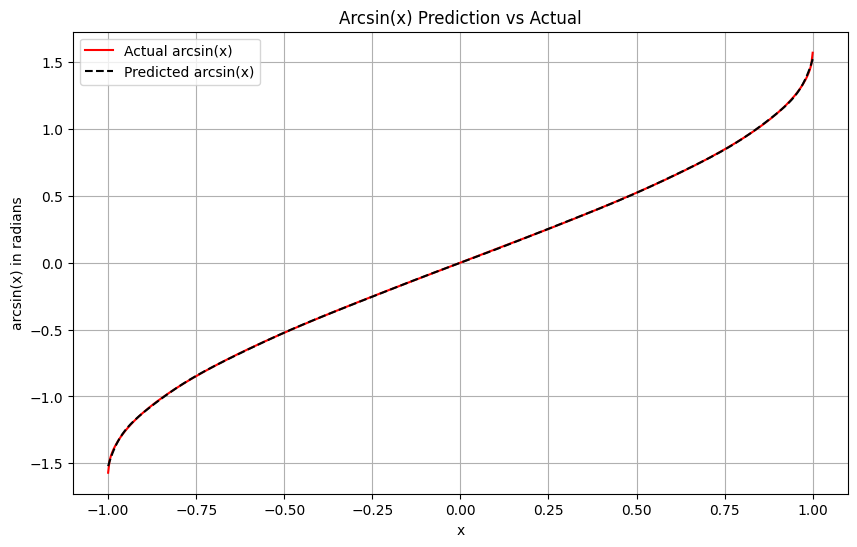


Predicted arcsin(0.5) = 0.5227 radians
Actual arcsin(0.5)    = 0.5236 radians
Accuracy                   = 0.9984

✅ Model saved to '/content/drive/MyDrive/Colab Notebooks/Trained models/arcsin_model.pkl'


In [ ]:
class ArcsinModel:
    def __init__(self, data_path, degree=15):
        self.data_path = data_path
        self.degree = degree
        self.model = None
        self.poly = PolynomialFeatures(degree=self.degree)
        self.X = None
        self.Y = None

    def load_data(self):
        df = pd.read_excel(self.data_path)
        df.columns = df.columns.str.strip()
        self.X = df['x_input'].values.reshape(-1, 1)
        self.Y = df['arcsin_output'].values.ravel()

    def train_model(self):
        X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y, test_size=0.2, random_state=42)
        X_train_poly = self.poly.fit_transform(X_train)
        X_test_poly = self.poly.transform(X_test)

        self.model = LinearRegression()
        self.model.fit(X_train_poly, Y_train)

        y_pred_test = self.model.predict(X_test_poly)
        print("\n--- Arcsin(x) Model Evaluation ---")
        print(f"R² Score: {r2_score(Y_test, y_pred_test):.4f}")
        print(f"MAE: {mean_absolute_error(Y_test, y_pred_test):.4f}")
        print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred_test)):.4f}")

    def predict(self, x_val):
        if not -1 <= x_val <= 1:
            print(f"Warning: x={x_val} is outside domain [-1, 1]. Clamping.")
            x_val = max(-1, min(1, x_val))

        x_val_poly = self.poly.transform(np.array([[x_val]]))
        return self.model.predict(x_val_poly)[0]

    def plot(self):
        x_vals = np.linspace(-1, 1, 500)
        y_pred = [self.predict(x) for x in x_vals]
        y_true = np.arcsin(x_vals)

        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_true, label='Actual arcsin(x)', color='red')
        plt.plot(x_vals, y_pred, label='Predicted arcsin(x)', color='black', linestyle='--')
        plt.title('Arcsin(x) Prediction vs Actual')
        plt.xlabel('x')
        plt.ylabel('arcsin(x) in radians')
        plt.legend()
        plt.grid(True)
        plt.show()

    def save_model(self, filename='arcsin_model.pkl'):
        joblib.dump({'model': self.model, 'poly': self.poly}, filename)
        print(f"\n✅ Model saved to '{filename}'")

if __name__ == "__main__":
    # Change the path to match your dataset location
    data_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/arcsin_dataset_1000_values.xlsx"
    arcsin_model = ArcsinModel(data_path)

    arcsin_model.load_data()
    arcsin_model.train_model()
    arcsin_model.plot()

    test_x = 0.5
    predicted = arcsin_model.predict(test_x)
    actual = math.asin(test_x)
    accuracy = 1 - abs(predicted - actual) / abs(actual) if actual != 0 else 1.0

    print(f"\nPredicted arcsin({test_x}) = {predicted:.4f} radians")
    print(f"Actual arcsin({test_x})    = {actual:.4f} radians")
    print(f"Accuracy                   = {accuracy:.4f}")

    arcsin_model.save_model("/content/drive/MyDrive/Colab Notebooks/Trained models/arcsin_model.pkl")

#HYPERBOLIC FUNCTIONS

##SINH(X) FUNCTION

In [ ]:
def predict_sinh(x, exp_model):
    exp_x = exp_model.predict_exp(x)
    exp_neg_x = exp_model.predict_exp(-x)
    return 0.5 * (exp_x - exp_neg_x)

if __name__ == "__main__":
    # Load trained exponential model saved previously
    exp_model = ExponentialModel()
    exp_model.load("/content/drive/MyDrive/Colab Notebooks/Trained models/exponential.pkl")

    # Input from user
    x_input = float(input("Enter x value to calculate sinh(x): "))
    sinh_pred = predict_sinh(x_input, exp_model)

    # Calculate actual sinh using math library safely
    if abs(x_input) > 709:  # prevent math range overflow
        actual_sinh = float('inf')
    else:
        actual_sinh = math.sinh(x_input)

    # Calculate accuracy if possible
    if math.isfinite(actual_sinh) and actual_sinh != 0:
        accuracy = 1 - abs(sinh_pred - actual_sinh) / abs(actual_sinh)
    else:
        accuracy = 1.0 if abs(sinh_pred) < 1e-9 else 0.0

    # Print results
    print(f"\nPredicted sinh({x_input}): {sinh_pred:.6f}")
    print(f"Actual sinh({x_input}):    {actual_sinh:.6f}")
    print(f"Accuracy:                  {accuracy:.6f}")

Enter x value to calculate sinh(x): 1.526

Predicted sinh(1.526): 2.190914
Actual sinh(1.526):    2.191169
Accuracy:                  0.999884


#INVERSE HYPERBOLIC FUNCTIONS

##SINH^-1(X) FUNCTION

Epoch 0, Loss: 45.239880
Epoch 200, Loss: 0.775123
Epoch 400, Loss: 0.008624
Epoch 600, Loss: 0.002403
Epoch 800, Loss: 0.000433
Epoch 1000, Loss: 0.000310
Epoch 1200, Loss: 0.003677
Epoch 1400, Loss: 0.009657
Epoch 1600, Loss: 0.000580
Epoch 1800, Loss: 0.000395
Input: 92
Model prediction: 5.249189
True arsinh: 5.214965
Absolute error: 0.034224

Model saved to /content/drive/MyDrive/Colab Notebooks/Trained models/arsinh_model.pth


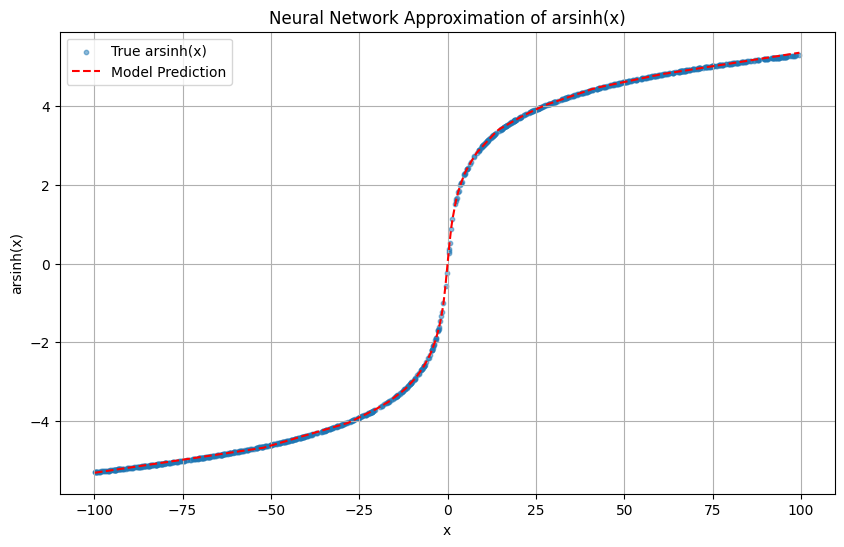

In [ ]:
# class ArsinhModelTrainer:
#     def __init__(self, data_path, model_path):
#         self.data_path = data_path
#         self.model_path = model_path
#         self.model = self._build_model()
#         self.criterion = nn.MSELoss()
#         self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)

#     def _build_model(self):
#         return ArsinhPredictor()  # Use shared model architecture

#     def load_data(self):
#         df = pd.read_excel(self.data_path)
#         X = df['x']
#         Y = df['sinh^-1(x)']

#         combined_df = pd.concat([X, Y], axis=1).dropna(subset=['sinh^-1(x)'])
#         self.X_cleaned = combined_df['x']
#         self.Y_cleaned = combined_df['sinh^-1(x)']

#         self.x_tensor = torch.from_numpy(self.X_cleaned.values).float().reshape(-1, 1)
#         self.y_tensor = torch.from_numpy(self.Y_cleaned.values).float().reshape(-1, 1)

#     def train(self, epochs=2000):
#         for epoch in range(epochs):
#             self.optimizer.zero_grad()
#             outputs = self.model(self.x_tensor)
#             loss = self.criterion(outputs, self.y_tensor)
#             loss.backward()
#             self.optimizer.step()
#             if epoch % 200 == 0:
#                 print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

#     def predict_and_compare(self, value):
#         pred = self.model.predict(value)
#         true_val = np.arcsinh(value)
#         print(f"Input: {value}")
#         print(f"Model prediction: {pred:.6f}")
#         print(f"True arsinh: {true_val:.6f}")
#         print(f"Absolute error: {abs(pred - true_val):.6f}\n")

#     def save_model(self):
#         torch.save(self.model.state_dict(), self.model_path)
#         print(f"Model saved to {self.model_path}")

#     def plot_predictions(self):
#         plt.figure(figsize=(10, 6))
#         with torch.no_grad():
#             y_pred_plot = self.model(self.x_tensor).numpy()

#         x_np = self.X_cleaned.values
#         y_np = self.Y_cleaned.values

#         sorted_indices = np.argsort(x_np)
#         x_sorted_plot = x_np[sorted_indices]
#         y_pred_sorted_plot = y_pred_plot[sorted_indices].flatten()

#         plt.scatter(x_np, y_np, label="True arsinh(x)", alpha=0.5, s=10)
#         plt.plot(x_sorted_plot, y_pred_sorted_plot, linestyle='--', color='red', label="Model Prediction")
#         plt.title("Neural Network Approximation of arsinh(x)")
#         plt.xlabel("x")
#         plt.ylabel("arsinh(x)")
#         plt.legend()
#         plt.grid(True)
#         plt.show()


# # ------------------------- Minimal Predictable Model -------------------------
# class ArsinhPredictor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.model = nn.Sequential(
#             nn.Linear(1, 64),
#             nn.ReLU(),
#             nn.Linear(64, 64),
#             nn.ReLU(),
#             nn.Linear(64, 1)
#         )

#     def forward(self, x):
#         return self.model(x)

#     def predict(self, x):
#         self.eval()
#         with torch.no_grad():
#             x_tensor = torch.tensor([[x]], dtype=torch.float32)
#             return self(x_tensor).item()


# # ------------------------- One-liner loader -------------------------
# def load_predictor(model_path):
#     model = ArsinhPredictor()
#     model.load_state_dict(torch.load(model_path))
#     model.eval()
#     return model


# # ------------------------- Training block -------------------------
# if __name__ == '__main__':
#     data_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/inverse hyperbolic.xlsx'
#     model_path = '/content/drive/MyDrive/Colab Notebooks/Trained models/arsinh_model.pth'

#     trainer = ArsinhModelTrainer(data_path, model_path)
#     trainer.load_data()
#     trainer.train()
#     trainer.predict_and_compare(92)
#     trainer.save_model()
#     trainer.plot_predictions()